# LOGISTIC REGRESSION

## 1. Data Exploration:
### a. Load the dataset and perform exploratory data analysis (EDA).
### b. Examine the features, their types, and summary statistics.
### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
### Analyze any patterns or correlations observed in the data.




In [5]:
import pandas as pd

df = pd.read_csv("Titanic_train.csv")

df.info(), df.head()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


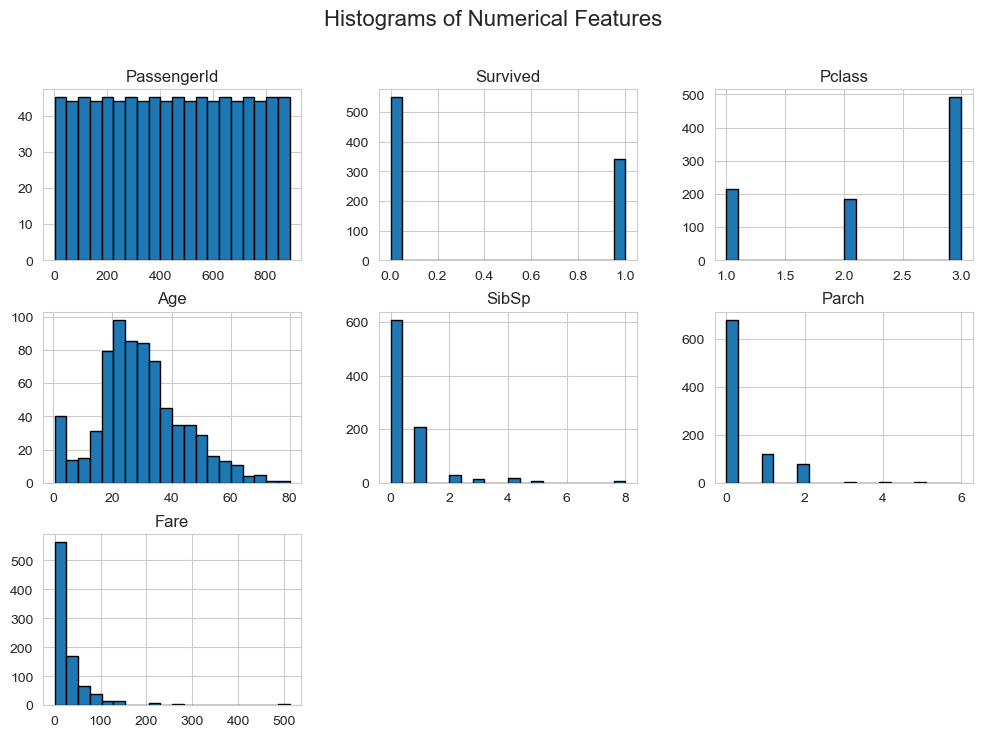

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


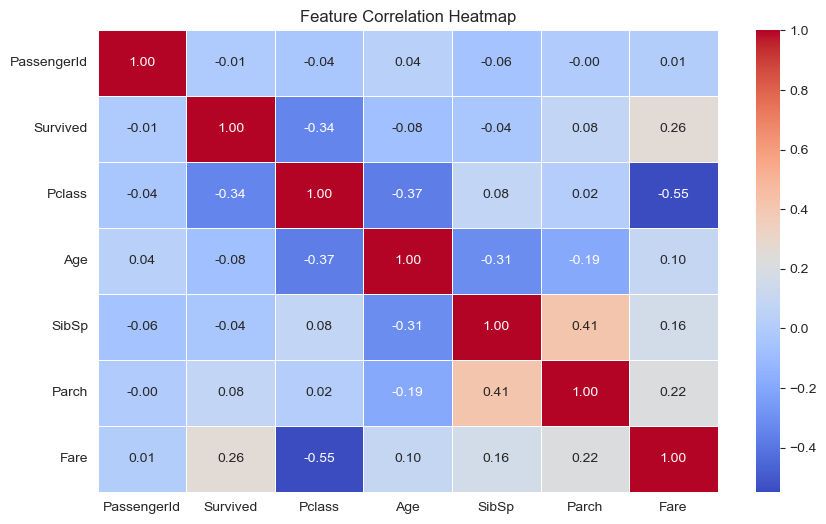

In [10]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## 2. Data Preprocessing:
### a. Handle missing values (e.g., imputation).
### b. Encode categorical variables.


In [11]:
from sklearn.preprocessing import LabelEncoder

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Cabin"] = df["Cabin"].fillna("Unknown")

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

df["Cabin"] = df["Cabin"].apply(lambda x: 0 if x == "Unknown" else 1)

df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(6), object(2)
memory usage: 75.0+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    1  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
 2                             Heikkinen, Miss. Laina    0  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
 4                           Allen, Mr. William Henry    1  35.0      0      0   
 
              Ticket     Fare  Cabin  Embarked_Q  Embarked_S  
 0         A/5 21171   7.2500      0       False        True  
 1          PC 17599  71.2833      1       False       False  
 2  STON/O2. 3101282   7.9250      0       False        True  
 3            113803  5

## 3. Model Building:
### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
### b. Train the model using the training data.


In [14]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

model

LogisticRegression(max_iter=300)

## 4. Model Evaluation:
### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
### Visualize the ROC curve.


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

evaluation_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "ROC-AUC": roc_auc,
}
evaluation_results


{'Accuracy': 0.8212290502793296,
 'Precision': 0.8,
 'Recall': 0.7567567567567568,
 'F1-score': 0.7777777777777778,
 'ROC-AUC': 0.8804375804375805}

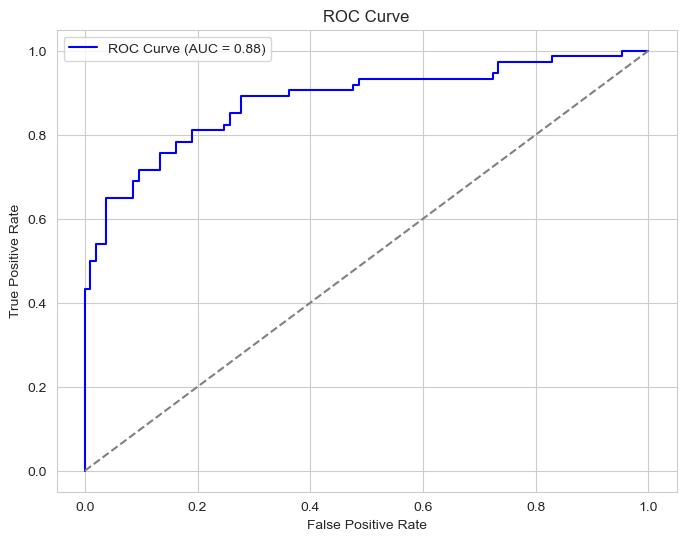

In [17]:
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## 5. Interpretation:
### a. Interpret the coefficients of the logistic regression model.
### b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [20]:
coefficients = pd.Series(model.coef_[0], index=features)

coefficients.sort_values(ascending=False)

Cabin         0.280507
Fare          0.091813
Embarked_Q   -0.058505
Parch        -0.106296
Embarked_S   -0.190985
SibSp        -0.347568
Age          -0.400670
Pclass       -0.601509
Sex          -1.284162
dtype: float64

### Feature Significance in Survival Prediction
#### Most Important Features:
### Sex (-1.28):
#### Strong negative coefficient → Males were less likely to survive than females.
#### This aligns with the "women and children first" policy.

### Pclass (-0.60):
#### Higher-class passengers had a better survival rate.
#### 1st class had a higher survival rate than 3rd class.

### Age (-0.40):
#### Older passengers had lower survival rates.
#### Younger passengers were prioritized for survival.

### SibSp (-0.35) & Parch (-0.11):
#### Traveling with family slightly decreased survival probability.
#### Large families may have struggled to evacuate quickly.

### Fare (+0.09):
#### Higher fares increased survival chances.
#### Wealthier passengers, often in 1st class, had better access to lifeboats.

### Cabin (+0.28):
#### Passengers with a known cabin had a higher chance of survival.
#### This suggests first-class passengers (who had assigned cabins) were more likely to survive.

### Embarked (Q: -0.05, S: -0.19):
#### Passengers who embarked from Southampton had a lower survival rate.
#### Many 3rd-class passengers boarded from Southampton.

## Interview Questions:
### 1. What is the difference between precision and recall?


#### Both Precision and Recall are evaluation metrics for classification models, especially in imbalanced datasets.
#### Precision (Positive Predictive Value):
    #### ● Out of all predicted positives, how many were actually positive?
    #### ● Precision= TP/TP+FP
    #### ● Important when false positives are costly (e.g., spam detection, fraud detection).
    
#### Recall (Sensitivity):
    #### ● Out of all actual positives, how many were correctly predicted?
    #### ● Recall= TP/TP+FN
    #### ● Important when false negatives are costly (e.g., disease diagnosis, security threat detection).


### 2. What is cross-validation, and why is it important in binary classification?

#### Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets and training/testing the model on different combinations of these subsets.


#### ● Prevents Overfitting – Ensures the model generalizes well instead of memorizing the training data.
#### ● More Reliable Performance Estimate – Unlike a single train-test split, it provides a better estimate of how the model will perform on unseen data.
#### ● Utilizes More Data for Training – Since multiple train-test splits are used, more data contributes to training, leading to better model performance.
#### ● Reduces Variability – The model is tested on multiple different subsets, reducing bias from a single split.